In [1]:
import bayes3d as b
import matplotlib.pyplot as plt
import jax.numpy as jnp

ModuleNotFoundError: No module named 'liblzfse'

In [2]:
b.setup_visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7060/static/


In [3]:
r3d_path = "./data/2023-09-05--16-08-21.r3d.zip"
colors, depths, poses, intrinsics = bayes3d.utils.load_r3d(r3d_path)

NameError: name 'bayes3d' is not defined

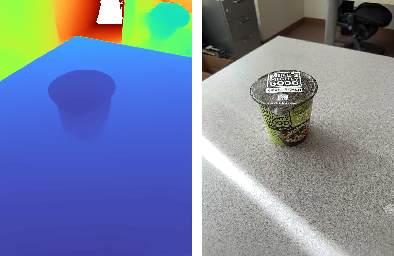

In [10]:
i=0
color = b.utils.resize(colors[i], intrinsics.height, intrinsics.width)
depth = depths[i]
cloud = b.unproject_depth_jit(depth, intrinsics).reshape(-1,3)
b.clear()
b.show_cloud("obs", cloud, color=jnp.transpose(color.reshape(-1,3))/255.0, size=0.003)
b.hstack_images([b.get_depth_image(depth), b.get_rgb_image(color)])

In [16]:
T1,T2 =0, 200
b.clear()
cloud1 = b.apply_transform(b.unproject_depth_jit(depths[T1], intrinsics).reshape(-1,3), poses[T1])
cloud2 = b.apply_transform(b.unproject_depth_jit(depths[T2], intrinsics).reshape(-1,3), poses[T2])
b.show_cloud("1", cloud1 * 3.0)
b.show_cloud("2", cloud2 * 3.0, color=b.RED)


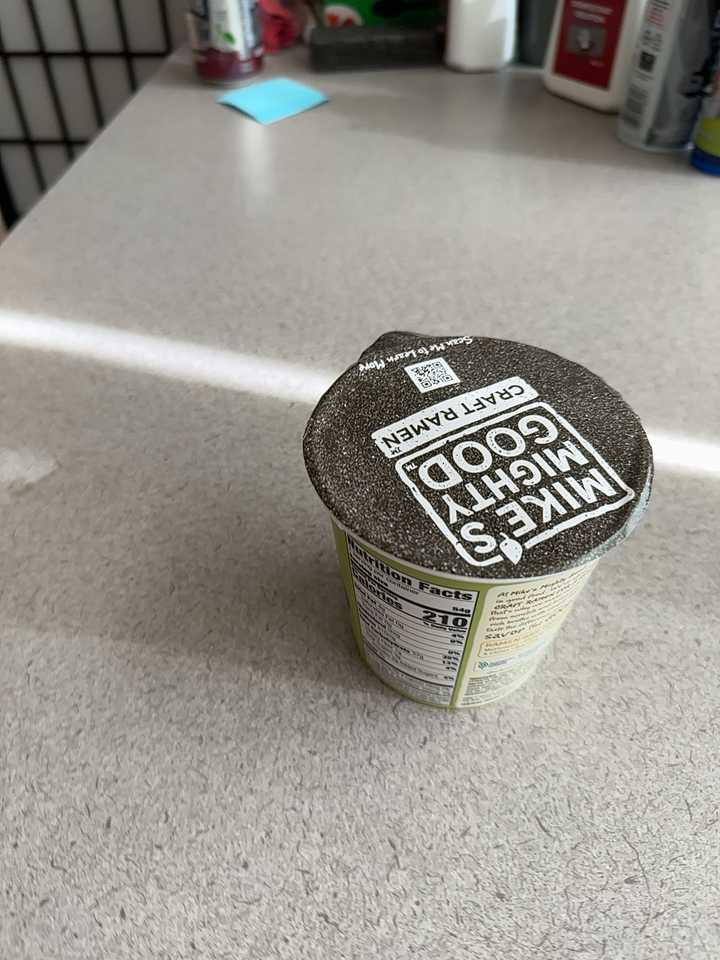

In [15]:
b.get_rgb_image(colors[200])

In [74]:
colors = color.reshape(-1,3).astype(np.float32)
assert cloud.shape == colors.shape
b.show_cloud("obs", cloud, color=np.transpose(colors)/255.0, size=0.003)

In [75]:
for i in range(10):
    b.show_pose(f"{i}", poses[i])

In [73]:
b.clear()